<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b>Regresion Lineal Python </b>
<br>
<i><b>Autores:</b></i><br> Juan Esteban Arias Patron <br> Christian David Jimenez   
<br>
<i><b>Asignatura:</b></i> Machine Learning en Computación Avanzada
<br>
<i><b>Docente:</b></i> John Corredor, PhD
<br>
24/10/21
<br>
</FONT>
</div>

****

#**REGRESION LINEAL MULTIPLE**

****

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

In [67]:
url = "/content/sample_data/winedata.csv"

In [68]:
df_winwNoNorm.shape

(1598, 12)

In [69]:
df_winwNoNorm = pd.read_csv(url)
df_winwNoNorm.head()

,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [70]:
# Visualizacion estadistica de los datos 
df_winwNoNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
7.4,1598.0,8.320213,1.741489,4.60000,7.1000,7.90000,9.200000,15.90000
0.7,1598.0,0.527713,0.179064,0.12000,0.3900,0.52000,0.640000,1.58000
0.0,1598.0,0.271145,0.194744,0.00000,0.0900,0.26000,0.420000,1.00000
1.9,1598.0,2.539205,1.410279,0.90000,1.9000,2.20000,2.600000,15.50000
0.076,1598.0,0.087474,0.047079,0.01200,0.0700,0.07900,0.090000,0.61100
11.0,1598.0,15.877972,10.462720,1.00000,7.0000,14.00000,21.000000,72.00000
34.0,1598.0,46.475594,32.904142,6.00000,22.0000,38.00000,62.000000,289.00000
0.9978,1598.0,0.996746,0.001888,0.99007,0.9956,0.99675,0.997837,1.00369
3.51,1598.0,3.310989,0.154355,2.74000,3.2100,3.31000,3.400000,4.01000
0.56,1598.0,0.658210,0.169542,0.33000,0.5500,0.62000,0.730000,2.00000


In [71]:
# Se revisa la informacion y los tipos de datos del dataFrame
df_winwNoNorm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.4     1598 non-null   float64
 1   0.7     1598 non-null   float64
 2   0.0     1598 non-null   float64
 3   1.9     1598 non-null   float64
 4   0.076   1598 non-null   float64
 5   11.0    1598 non-null   float64
 6   34.0    1598 non-null   float64
 7   0.9978  1598 non-null   float64
 8   3.51    1598 non-null   float64
 9   0.56    1598 non-null   float64
 10  9.4     1598 non-null   float64
 11  5       1598 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


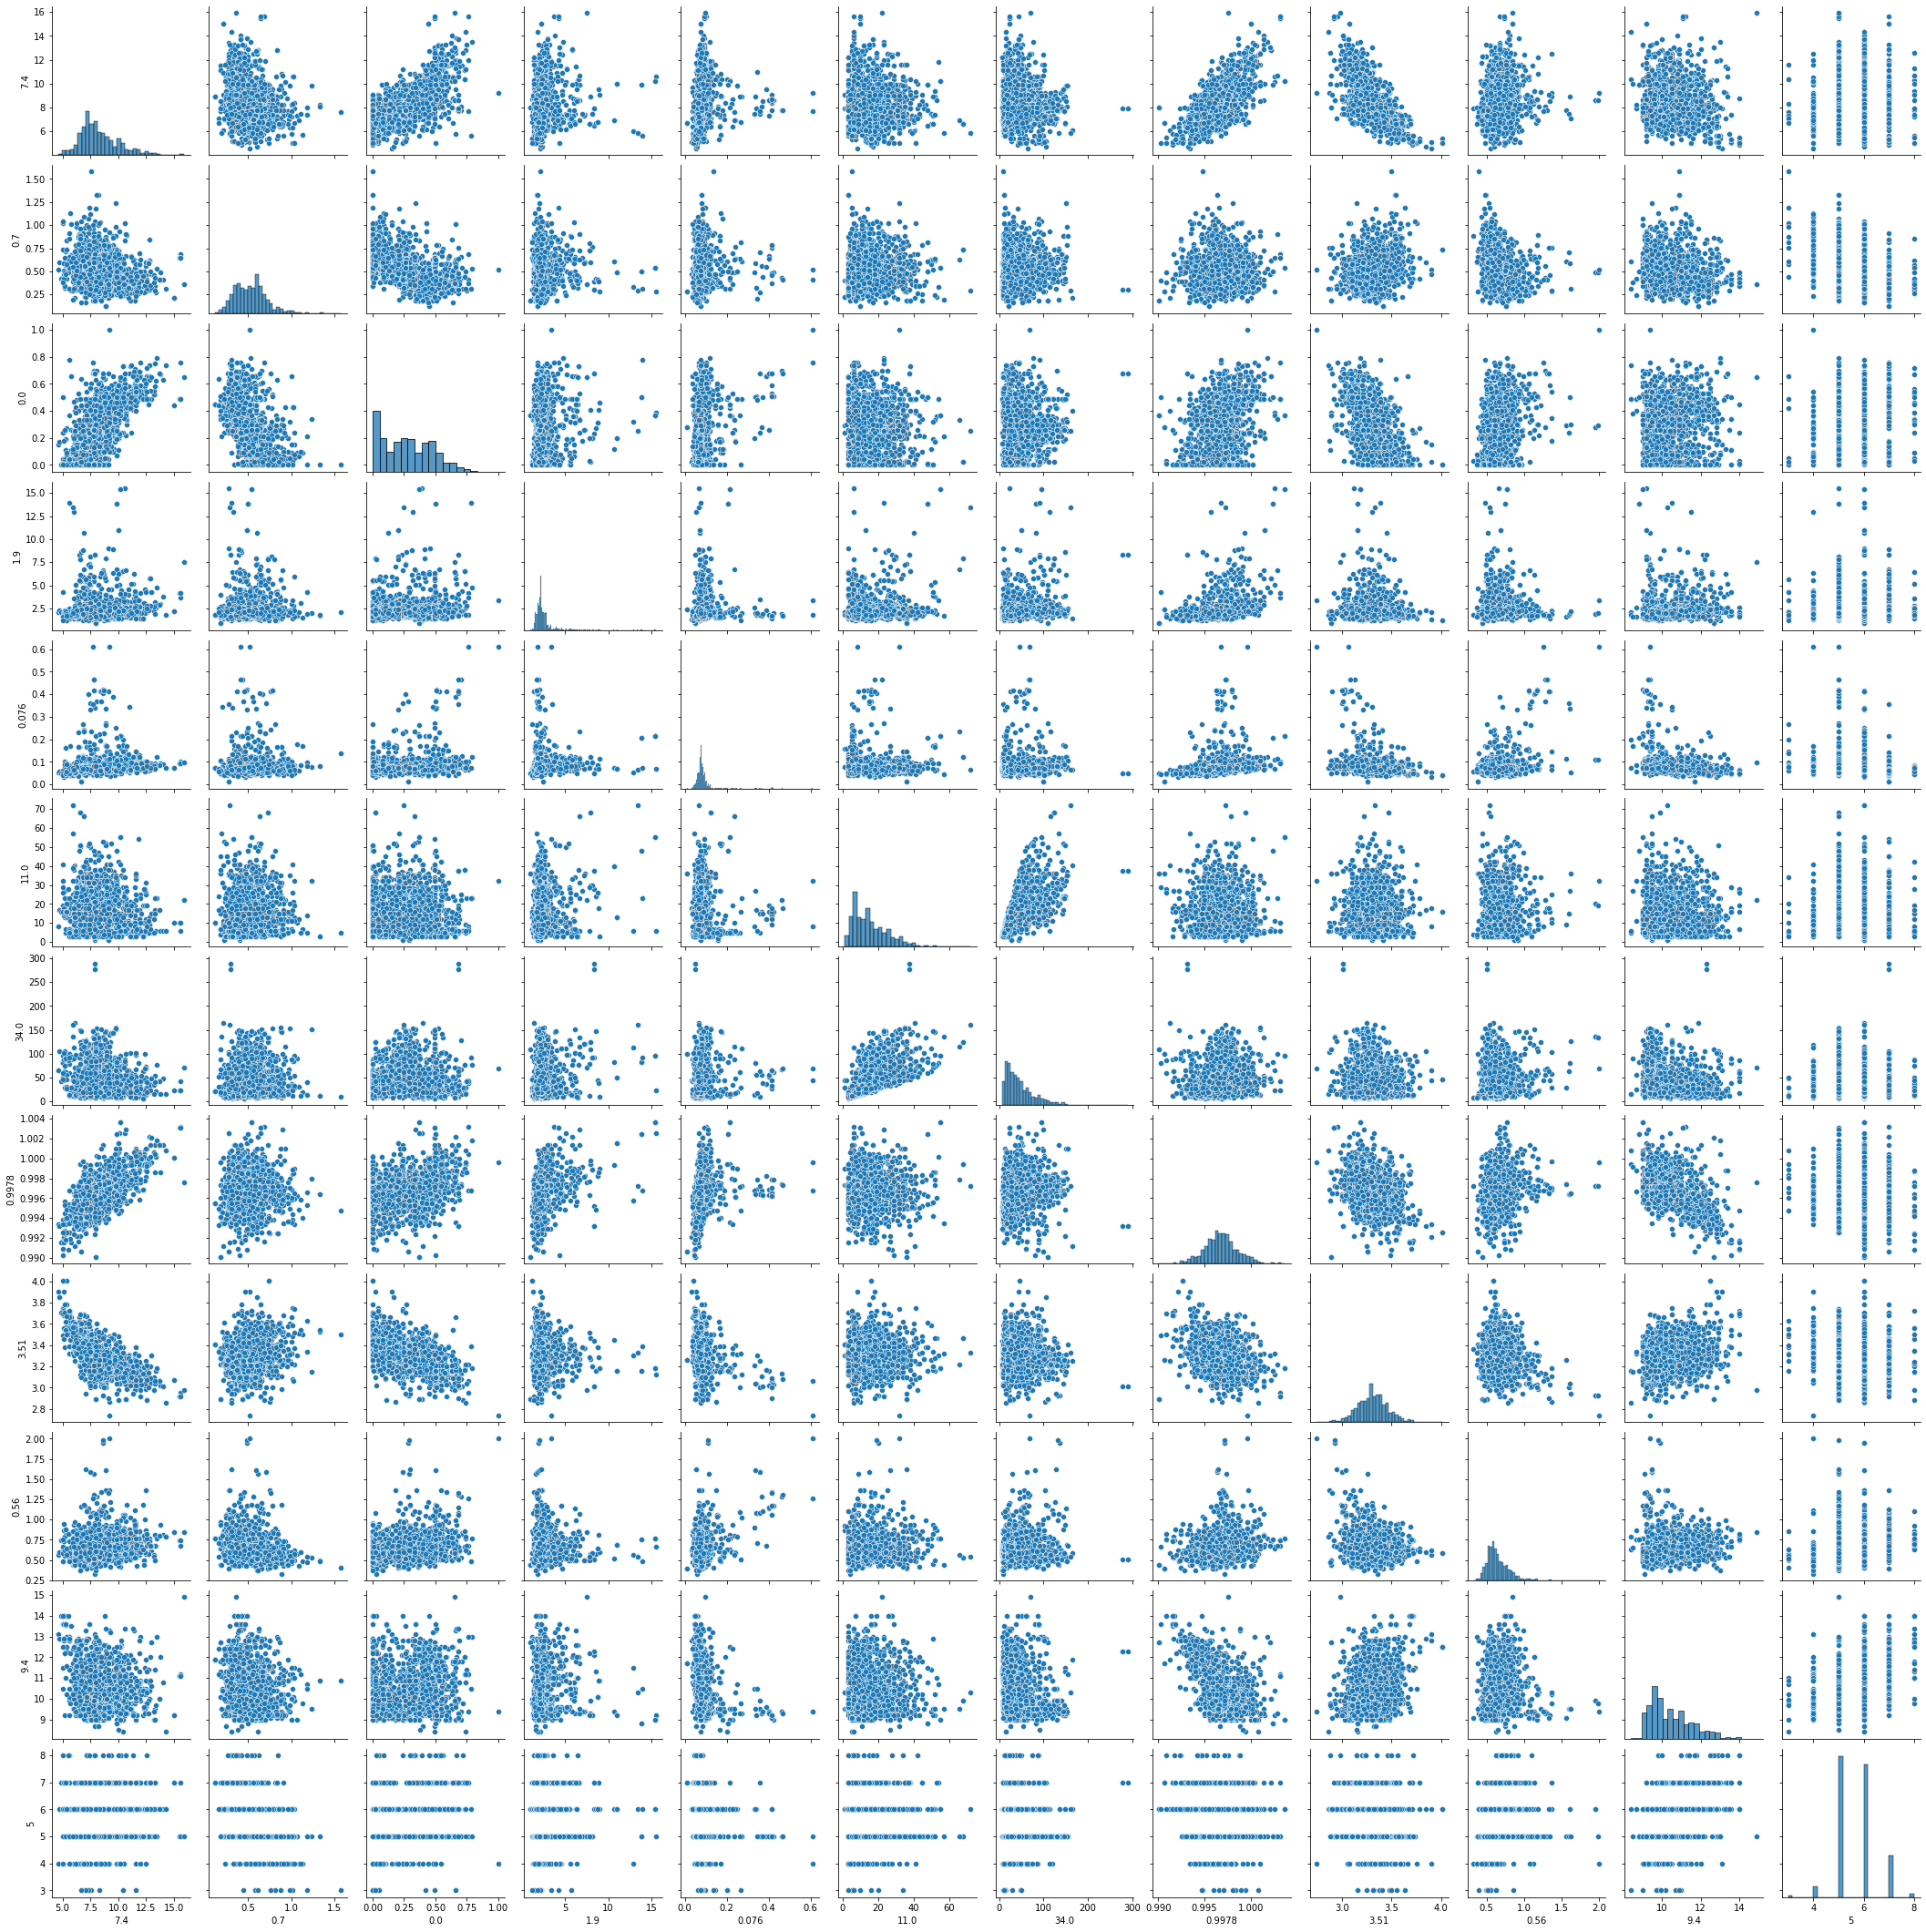

In [72]:
# Visuaalizacion grafica de los datos dispersion par, por variables
sns.pairplot(df_winwNoNorm) 

In [73]:
# Se presenta la matriz de coorelacion entre las variables
matrizCOrNoNorm = df_winwNoNorm.corr()
matrizCOrNoNorm

,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.4,1.000000,-0.255909,0.671709,0.114644,0.093635,-0.153972,-0.113322,0.668355,-0.682967,0.182849,-0.062009,0.123826
0.7,-0.255909,1.000000,-0.552152,0.002191,0.061463,-0.010227,0.076724,0.021699,0.234351,-0.260741,-0.201827,-0.390272
0.0,0.671709,-0.552152,1.000000,0.143279,0.203738,-0.061425,0.035226,0.365691,-0.541391,0.312488,0.109165,0.225867
1.9,0.114644,0.002191,0.143279,1.000000,0.055545,0.186942,0.202943,0.355499,-0.085337,0.005364,0.041818,0.013512
0.076,0.093635,0.061463,0.203738,0.055545,1.000000,0.005492,0.047346,0.200741,-0.264972,0.371218,-0.221355,-0.129054
11.0,-0.153972,-0.010227,-0.061425,0.186942,0.005492,1.000000,0.667631,-0.021787,0.070795,0.051498,-0.069713,-0.050899
34.0,-0.113322,0.076724,0.035226,0.202943,0.047346,0.667631,1.000000,0.071412,-0.066226,0.042816,-0.205950,-0.185332
0.9978,0.668355,0.021699,0.365691,0.355499,0.200741,-0.021787,0.071412,1.000000,-0.342361,0.148739,-0.496036,-0.174695
3.51,-0.682967,0.234351,-0.541391,-0.085337,-0.264972,0.070795,-0.066226,-0.342361,1.000000,-0.196303,0.206574,-0.057137
0.56,0.182849,-0.260741,0.312488,0.005364,0.371218,0.051498,0.042816,0.148739,-0.196303,1.000000,0.093283,0.251187


In [74]:
## Se dividen los datos en atributos y etiquetas 

X = df_winwNoNorm[['7.4','0.7','0.0','1.9','0.076','11.0','34.0','0.9978','0.56','9.4']]
y = df_winwNoNorm['5']

In [75]:
# Se procede a dividir los datos en conjuntos de 
# prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
# Constuyo el modelo y se ajusta el modelo

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# El modelo de regresión tiene que encontrar 
# los coeficientes más óptimos para todos 
# los atributos

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coeficientes'])
coeff_df

,Coeficientes
7.4,0.085208
0.7,-1.124164
0.0,-0.238981
1.9,0.035060
0.076,-1.806458
11.0,0.001393
34.0,-0.002506
0.9978,-48.569962
0.56,0.924391
9.4,0.238374


In [78]:
# Se realiza predicciones usando los datos de prueba
y_pred = regressor.predict(X_test)

In [84]:
## Se comparan los valores y_test con
## con los valores predichos

df = pd.DataFrame({'Actuales': y_test, 'Predichos': y_pred})
df

,Actuales,Predichos
913,6,6.156779
1031,5,5.067852
1000,7,6.180865
487,7,6.251324
977,7,5.962660
...,...,...
793,6,6.539470
1392,5,5.414978
1321,5,6.245989
704,5,4.842525


In [82]:
# El error absoluto medio
print('Error absoluto:', metrics.mean_absolute_error(y_test, y_pred))

# El error cuadrático medio
print('Error cuadrado:', metrics.mean_squared_error(y_test, y_pred))

Error absoluto: 0.48827381021496175
Error cuadrado: 0.40449411945546654
